In [10]:
import pandas as pd
import re
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import seaborn as sns

from gensim.models import LdaModel, CoherenceModel
from gensim import corpora
import spacy, logging, warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,\
                            recall_score, f1_score, jaccard_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /Users/demid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/demid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('code')


In [14]:
newWords = [ 'new', 'code']
stopwords.append('new')

In [15]:
#stop = set(stopwords.words('english'))
#print(stop)

In [80]:
df1 = pd.read_csv('/Users/demid/Downloads/QueryResults(1).csv', sep=',', engine='python', error_bad_lines=False )

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
df1.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,Spring JSON request body not mapped to Java POJO,<p>I'm using Spring to implement a RESTful web...,<java><json><spring><spring-mvc><jackson>,38960117,26,64912,7,5
1,Communicate with Activity from Service (LocalS...,<p>Common scenario - Activity with a backgroun...,<android><service><android-activity><android-i...,4908267,20,25781,8,3
2,How to set the From email address for mailx co...,<p>I am working on a KornShell (ksh) script ru...,<shell><email><solaris><ksh><mailx>,1296979,41,153787,10,8
3,AnkhSVN versus VisualSVN,<p>I currently use AnkhSVN to integrate subver...,<visual-studio><svn><version-control><visualsv...,24045,59,27505,6,4
4,Is there a performance difference between i++ ...,<p>Is there a performance difference between <...,<c><performance><optimization><post-increment>...,24886,512,123231,168,14


In [18]:
df1.shape

(50000, 8)

In [19]:
tags = list(map(lambda x: set(re.findall("<(.*?)>", x)), df1['Tags']))
tags = sorted(set.union(*tags))
print("Nombre de tags :", len(tags))
print(tags)

Nombre de tags : 16829
['.a', '.app', '.bash-profile', '.class-file', '.doc', '.hgtags', '.htaccess', '.htpasswd', '.net', '.net-1.1', '.net-2.0', '.net-3.0', '.net-3.5', '.net-4.0', '.net-4.0-beta-2', '.net-4.5', '.net-4.6', '.net-4.6.2', '.net-5', '.net-6.0', '.net-assembly', '.net-attributes', '.net-core', '.net-core-2.0', '.net-core-2.2', '.net-core-3.0', '.net-core-logging', '.net-core-rc2', '.net-framework-version', '.net-internals', '.net-micro-framework', '.net-native', '.net-remoting', '.net-standard', '.net-standard-2.0', '.obj', '.profile', '.refresh', '.when', '12factor', '16-bit', '2-3-4-tree', '2-legged', '2048', '24-bit', '2d', '2d-games', '2phase-commit', '3-tier', '3-way-merge', '32-bit', '3270', '32bit-64bit', '360-degrees', '3d', '3d-model', '3d-modelling', '3d-reconstruction', '3des', '3dr', '3dsmax', '3dtouch', '3g', '3gp', '3nf', '4g', '64-bit', '6502', '7-bit', '7zip', '8051', 'a-star', 'a2dp', 'aac', 'aadhaar', 'aapt', 'aar', 'ab-testing', 'abac', 'abaddressbook

In [20]:
df1['Tags'] = list(map(lambda x: re.findall("<(.*?)>", x), df1['Tags']))

In [21]:
all_tags = []

for i in range(0, 50000):
    for j in range(len(df1['Tags'].iloc[i])):
        all_tags.append(df1['Tags'].iloc[i][j])

In [22]:
CounterVariable = Counter(all_tags)
most_occur = CounterVariable.most_common(100)
print(most_occur)

[('java', 5780), ('python', 5254), ('c#', 5230), ('javascript', 4816), ('ios', 4250), ('android', 3514), ('c++', 3482), ('.net', 2771), ('objective-c', 2358), ('iphone', 2337), ('html', 2149), ('php', 1884), ('jquery', 1840), ('c', 1671), ('linux', 1416), ('css', 1324), ('sql', 1195), ('performance', 1161), ('swift', 1159), ('node.js', 1148), ('asp.net', 1136), ('xcode', 1126), ('spring', 1063), ('ruby-on-rails', 984), ('windows', 977), ('asp.net-mvc', 931), ('json', 919), ('mysql', 872), ('multithreading', 871), ('algorithm', 858), ('database', 840), ('cocoa-touch', 759), ('arrays', 759), ('ruby', 750), ('macos', 736), ('string', 736), ('sql-server', 708), ('django', 700), ('c++11', 691), ('image', 622), ('ajax', 610), ('wpf', 610), ('bash', 584), ('unit-testing', 576), ('git', 574), ('r', 570), ('security', 549), ('numpy', 549), ('hibernate', 519), ('rest', 519), ('pandas', 517), ('python-3.x', 507), ('visual-studio', 492), ('reactjs', 482), ('angularjs', 464), ('machine-learning', 4

In [23]:
centtags = []
for i in range(0, 100):
    centtags.append(most_occur[i][0])

In [24]:
print(centtags)

['java', 'python', 'c#', 'javascript', 'ios', 'android', 'c++', '.net', 'objective-c', 'iphone', 'html', 'php', 'jquery', 'c', 'linux', 'css', 'sql', 'performance', 'swift', 'node.js', 'asp.net', 'xcode', 'spring', 'ruby-on-rails', 'windows', 'asp.net-mvc', 'json', 'mysql', 'multithreading', 'algorithm', 'database', 'cocoa-touch', 'arrays', 'ruby', 'macos', 'string', 'sql-server', 'django', 'c++11', 'image', 'ajax', 'wpf', 'bash', 'unit-testing', 'git', 'r', 'security', 'numpy', 'hibernate', 'rest', 'pandas', 'python-3.x', 'visual-studio', 'reactjs', 'angularjs', 'machine-learning', 'http', 'gcc', 'postgresql', 'eclipse', 'google-chrome', 'ipad', 'shell', 'jpa', 'entity-framework', 'authentication', 'cocoa', 'debugging', 'xml', 'optimization', 'ssl', 'asynchronous', 'spring-boot', 'spring-mvc', 'image-processing', 'maven', 'ruby-on-rails-3', 'unix', 'scala', 'opencv', 'angular', 'list', 'file', 'ubuntu', 'class', 'laravel', 'math', 'dataframe', 'apache', 'amazon-web-services', 'assembl

In [25]:
y = [count for tag, count in CounterVariable.most_common(20)]
x = [tag for tag, count in CounterVariable.most_common(20)]

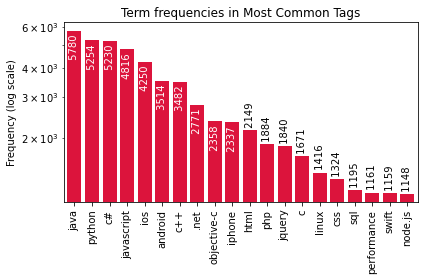

In [26]:
plt.bar(x, y, color='crimson')
plt.title("Term frequencies in Most Common Tags")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') 
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(CounterVariable.most_common(20)):
            plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) 
plt.tight_layout() 
plt.show()

In [27]:
df1['Tags'].head()

0            [java, json, spring, spring-mvc, jackson]
1    [android, service, android-activity, android-i...
2                  [shell, email, solaris, ksh, mailx]
3    [visual-studio, svn, version-control, visualsv...
4    [c, performance, optimization, post-increment,...
Name: Tags, dtype: object

In [28]:
df1['tags_filtered'] = [[t for t in Tags if t in centtags] for Tags in df1['Tags']]


In [29]:
df1.shape

(50000, 9)

In [30]:
df1 = df1.loc[df1["tags_filtered"].apply(len) > 0]

In [31]:
df1.shape

(46990, 9)

#### Cleaning of Title and Body

In [32]:
df1["clean_title"] = df1["Title"].apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))

In [33]:
df1["clean_title"] = df1["clean_title"].apply(lambda s: ' '.join(re.sub("[.,!?):;(-='...@#_>]", " ", s).split()))

In [34]:
df1["clean_title"] = df1["clean_title"].apply(lambda s: ' '.join(re.sub(r'[0-9]+', '', s).split()))

In [35]:
#stop = set(stopwords.words('english'))
#print(stop)

In [36]:
def rem_sw(text):
    words = text.lower().split()
    stop_free_words = [word for word in words if word not in stopwords] 
    stop_free_text = " ".join(stop_free_words)
    return stop_free_text

In [37]:
df1['clean_title'] = df1['clean_title'].apply(lambda  s: rem_sw(s))

In [38]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
df1['clean_title'] = df1['clean_title'].apply(lambda  x:  tokenizer.tokenize(x))          

In [39]:
lemmatizer = WordNetLemmatizer()
df1["clean_title"] = df1["clean_title"].apply(lambda tokens: [lemmatizer.lemmatize(token, pos='v') for token in tokens])

In [40]:
df1["clean_body"] = df1["Body"].apply(lambda s: ' '.join(re.sub("<p>", " ", s).split()))

In [41]:
df1["clean_body"] = df1["clean_body"].apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))

In [42]:
df1["clean_body"] = df1["clean_body"].apply(lambda s: ' '.join(re.sub("[.,!?):;(-='...@#_>]", " ", s).split()))

In [43]:
df1["clean_body"] = df1["clean_body"].apply(lambda s: ' '.join(re.sub(r'[0-9]+', '', s).split()))

In [44]:
df1['clean_body'] = df1['clean_body'].apply(lambda  s: rem_sw(s))

In [45]:
df1['clean_body'] = df1['clean_body'].apply(lambda  x:  tokenizer.tokenize(x))         

In [46]:
df1["clean_body"] = df1["clean_body"].apply(lambda tokens: [lemmatizer.lemmatize(token, pos='v') for token in tokens])

In [47]:
df1.columns

Index(['Title', 'Body', 'Tags', 'Id', 'Score', 'ViewCount', 'FavoriteCount',
       'AnswerCount', 'tags_filtered', 'clean_title', 'clean_body'],
      dtype='object')

In [48]:
df2 = df1.drop(df1[['Title', 'Body', 'Tags', 'Id', 'Score', 'ViewCount', 'FavoriteCount',
       'AnswerCount']], axis=1)

In [49]:
df2.head(3)

,tags_filtered,clean_title,clean_body
0,"[java, json, spring, spring-mvc]","[spring, json, request, body, map, java, pojo]","[use, spring, implement, restful, web, service..."
1,[android],"[communicate, activity, service, localservice,...","[common, scenario, activity, background, servi..."
2,[shell],"[set, email, address, mailx, command]","[work, kornshell, ksh, script, run, solaris, s..."


In [50]:
df2.shape

(46990, 3)

In [51]:
df2['text'] = df2['clean_title']   + df2['clean_body']

In [52]:
df2.head()

,tags_filtered,clean_title,clean_body,text
0,"[java, json, spring, spring-mvc]","[spring, json, request, body, map, java, pojo]","[use, spring, implement, restful, web, service...","[spring, json, request, body, map, java, pojo,..."
1,[android],"[communicate, activity, service, localservice,...","[common, scenario, activity, background, servi...","[communicate, activity, service, localservice,..."
2,[shell],"[set, email, address, mailx, command]","[work, kornshell, ksh, script, run, solaris, s...","[set, email, address, mailx, command, work, ko..."
3,[visual-studio],"[ankhsvn, versus, visualsvn]","[currently, use, ankhsvn, integrate, subversio...","[ankhsvn, versus, visualsvn, currently, use, a..."
4,"[c, performance, optimization]","[performance, difference, c]","[performance, difference, result, value, use, p]","[performance, difference, c, performance, diff..."


In [53]:
df3 = df2.drop(df2[['clean_title', 'clean_body']], axis=1)

In [54]:
df3.head()

,tags_filtered,text
0,"[java, json, spring, spring-mvc]","[spring, json, request, body, map, java, pojo,..."
1,[android],"[communicate, activity, service, localservice,..."
2,[shell],"[set, email, address, mailx, command, work, ko..."
3,[visual-studio],"[ankhsvn, versus, visualsvn, currently, use, a..."
4,"[c, performance, optimization]","[performance, difference, c, performance, diff..."


In [55]:
data = df3['text'].values.tolist()

In [56]:
data

[['spring',
  'json',
  'request',
  'body',
  'map',
  'java',
  'pojo',
  'use',
  'spring',
  'implement',
  'restful',
  'web',
  'service',
  'one',
  'endpoints',
  'take',
  'json',
  'string',
  'request',
  'body',
  'wish',
  'map',
  'pojo',
  'however',
  'seem',
  'right',
  'pass',
  'json',
  'string',
  'property',
  'map',
  'pojo',
  'p',
  'restcontroller',
  'interface',
  'p',
  'pre',
  'requestmapping',
  'value',
  'send',
  'headers',
  'accept',
  'application',
  'json',
  'method',
  'requestmethod',
  'post',
  'public',
  'void',
  'sendemails',
  'requestbody',
  'customerinfo',
  'customerinfo',
  'pre',
  'data',
  'model',
  'p',
  'pre',
  'public',
  'class',
  'customerinfo',
  'private',
  'string',
  'firstname',
  'private',
  'string',
  'lastname',
  'public',
  'customerinfo',
  'firstname',
  'first',
  'lastname',
  'last',
  'public',
  'customerinfo',
  'string',
  'firstname',
  'string',
  'lastname',
  'firstname',
  'firstname',
  'las

In [57]:
df3['text']=[" ".join(text) for text in df3['text'].values]

In [58]:
df3.head()

,tags_filtered,text
0,"[java, json, spring, spring-mvc]",spring json request body map java pojo use spr...
1,[android],communicate activity service localservice andr...
2,[shell],set email address mailx command work kornshell...
3,[visual-studio],ankhsvn versus visualsvn currently use ankhsvn...
4,"[c, performance, optimization]",performance difference c performance differenc...


In [84]:
from google.colab import files
uploaded = files.upload()


ModuleNotFoundError: No module named 'google.colab'

In [83]:
df3_bert = df3.to_csv('/drive/MyDrive/df3_bert.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/drive/MyDrive/df3_bert.csv'

### BERT

In [59]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

2022-07-08 08:34:03.147158: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [60]:
from platform import python_version
print(python_version())

3.9.7


In [61]:
# conda install pytorch torchvision -c pytorch

Solving environment: - ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [62]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')



loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /Users/demid/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at /Users/demid/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /Users/demid/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f

In [63]:
text = "Here is the sentence I want embeddings for."
marked_text = "[CLS] " + text + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

# Print out the tokens.
print (tokenized_text)


['[CLS]', 'here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.', '[SEP]']


In [85]:
df3.head()

,tags_filtered,text
0,"[java, json, spring, spring-mvc]",spring json request body map java pojo use spr...
1,[android],communicate activity service localservice andr...
2,[shell],set email address mailx command work kornshell...
3,[visual-studio],ankhsvn versus visualsvn currently use ankhsvn...
4,"[c, performance, optimization]",performance difference c performance differenc...


In [87]:
df3.to_csv('df3_colab')

In [64]:
# Split the data into text (X) and labels (Y)
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    df3['text'], df3['tags_filtered'], test_size=0.2, random_state=11)

In [65]:
sentences_train = X_train1.to_list()
sentences_test = X_test1.to_list()

In [66]:
for sent in sentences_train:
        bert_inp = tokenizer.tokenize(sent)

In [67]:
from transformers import BertModel, BertConfig


In [68]:
input_ids=[]
token_type_ids = []
attention_mask=[]
bert_inp_tot = []

max_length = 64
batch_size = 10

for sent in sentences_train:
        bert_inp = tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

In [69]:
input_ids = np.asarray(input_ids)
token_type_ids = np.asarray(token_type_ids)
attention_mask = np.array(attention_mask)

In [72]:
import time

In [75]:
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot

In [ ]:
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [ ]:
# mode = HF

model_type = model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)

batch_size = 10
batch_size_pred = 10
bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
time1 = time.time()

for step in range(len(sentences_train)//batch_size) :
    idx = step*batch_size
    input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences_train[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
    
    outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
    last_hidden_states = outputs.last_hidden_state
        
features_bert = np.array(last_hidden_states_tot).mean(axis=1)

In [76]:
model_type = model_type = 'bert-base-uncased'

batch_size = 10
batch_size_pred = 10
bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
time1 = time.time()

for step in range(len(sentences_train)//batch_size) :
    idx = step*batch_size
    input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences_train[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
    if mode=='HF' :    # Bert HuggingFace
        outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
        last_hidden_states = outputs.last_hidden_state

    if mode=='TFhub' : # Bert Tensorflow Hub
        text_preprocessed = {"input_word_ids" : input_ids, 
                                "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
        outputs = model(text_preprocessed)
        last_hidden_states = outputs['sequence_output']
             
    if step ==0 :
        last_hidden_states_tot = last_hidden_states
        last_hidden_states_tot_0 = last_hidden_states
    else :
        last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
features_bert = np.array(last_hidden_states_tot).mean(axis=1)

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /Users/demid/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/res

NameError: name 'mode' is not defined

In [65]:
bert_inp

{'input_ids': <tf.Tensor: shape=(1, 64), dtype=int32, numpy=
array([[  101,  7374, 29278,  3366,  9077, 10438, 13910,  5657, 24415,
         5178, 16778,  8873,  2121,  4604,  2121,  4687,  3853,  2516,
         2147,  2036,  4604,  2121, 16381,  1052,  2292,  2360,  6462,
        11562,  2655, 10438, 13910,  5657,  4118,  2036,  2655, 20776,
        13910,  5657,  4118,  2092, 20776, 13910,  5657,  4118,  2655,
        10438, 13910,  5657,  4118,  6462,  2811,  1052,  2036,  4604,
         2121, 16381,  3853,  4957,  3413,  5164,  4604,  2121, 10438,
          102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 64), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 64), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [69]:
bert_inp['input_ids'][0]

<tf.Tensor: shape=(64,), dtype=int32, numpy=
array([  101,  7374, 29278,  3366,  9077, 10438, 13910,  5657, 24415,
        5178, 16778,  8873,  2121,  4604,  2121,  4687,  3853,  2516,
        2147,  2036,  4604,  2121, 16381,  1052,  2292,  2360,  6462,
       11562,  2655, 10438, 13910,  5657,  4118,  2036,  2655, 20776,
       13910,  5657,  4118,  2092, 20776, 13910,  5657,  4118,  2655,
       10438, 13910,  5657,  4118,  6462,  2811,  1052,  2036,  4604,
        2121, 16381,  3853,  4957,  3413,  5164,  4604,  2121, 10438,
         102], dtype=int32)>

In [70]:
input_ids=[]
input_ids.append(bert_inp['input_ids'][0])

In [71]:
token_type_ids = []
attention_mask=[]
bert_inp_tot = []


In [ ]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)


In [ ]:
bert_inp[0]

In [ ]:
input_ids=[]
token_type_ids = []
attention_mask=[]
bert_inp_tot = []
    
input_ids.append(bert_inp['input_ids'][0])

token_type_ids.append(bert_inp['token_type_ids'][0])
attention_mask.append(bert_inp['attention_mask'][0])
bert_inp_tot.append((bert_inp['input_ids'][0], 
bert_inp['token_type_ids'][0], 
bert_inp['attention_mask'][0]))

In [ ]:
for sent in sentences:
        bert_inp = tokenizer.tokenize(sent)
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)

In [ ]:
tf.test.is_built_with_cuda() 

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

In [ ]:
# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [ ]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

#### BERT hub Tensorflow

In [ ]:
import tensorflow_hub as hub
import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [ ]:
#!pip install tensorflow_text
#!pip install tensorflow_hub

In [ ]:
sentences = df3['text'].to_list()

In [ ]:
import time

max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

In [ ]:
# Split the data into text (X) and labels (Y)
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    df3['text'], df3['tags_filtered'], test_size=0.2, random_state=11)

In [ ]:
sentences_train = X_train1.to_list()
sentences_test = X_test1.to_list()

In [ ]:
 #Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences_train, 
                                                         max_length, batch_size, mode='HF')

In [ ]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences_train, 
                                                         max_length, batch_size, mode='TFhub')

## USE

In [ ]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [ ]:
batch_size = 10
sentences_train = X_train1.to_list()

In [ ]:
len(sentences_train)

In [ ]:
features_USE_train = feature_USE_fct(sentences_train, batch_size)

In [ ]:
features_USE_test = feature_USE_fct(sentences_test, batch_size)

In [ ]:
features_USE_train

In [ ]:
features_USE_train.shape

In [ ]:
df_train = pd.DataFrame(data = features_USE_train) 

In [ ]:
X_train1.shape

In [ ]:
df_train.head()

In [ ]:
df.shape

In [ ]:
y_train1.head()

In [ ]:
y_train1.shape

In [ ]:
dtW = DecisionTreeClassifier()
dtW.fit(df, y_train1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(df, y_train1)


### https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [ ]:
data1 = df3['text'].values.tolist()

In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

In [ ]:
data_words = list(sent_to_words(data1))

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [ ]:
# !pip install spacy

In [ ]:
import gensim, spacy, logging, warnings

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words]

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           )

### Choosing the optimal number of topics

In [ ]:
coherence = []
for k in range(5,20):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus, num_topics=k, 
               id2word = id2word, passes=40,
               #iterations=200,
                   chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(
         model=ldamodel, texts=data_words,
         dictionary=id2word, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))

In [ ]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

In [ ]:
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

### LDA model with 16 topics:

In [ ]:
Lda = gensim.models.ldamodel.LdaModel

In [ ]:
ldamodel = Lda(corpus, num_topics=16, 
               id2word = id2word, passes=40,
               iterations=200,
                   chunksize = 10000, eval_every = None)

In [ ]:
ldamodel.show_topics(formatted=False)

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=400)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Extraction of dominant topic and contribution percent of that topic 

In [ ]:
data_dict = {'dominant_topic':[], 'perc_contribution':[], 'topic_keywords':[]}

for i, row in enumerate(ldamodel[corpus]):
    row = sorted(row, key=lambda x: x[1], reverse=True)
    for j, (topic_num, prop_topic) in enumerate(row):
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        data_dict['dominant_topic'].append(int(topic_num))
        data_dict['perc_contribution'].append(round(prop_topic, 3))
        data_dict['topic_keywords'].append(topic_keywords)
        #print(topic_keywords)
        break

df_topics = pd.DataFrame(data_dict)

contents = pd.Series(data_words)


df_topics.head()

In [ ]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))
list1 = df_topics['topic_keywords'][0]
list2 = df3['tags_filtered'][0]
jaccard_similarity(list1, list2)

In [ ]:
JS = []
count=0
for i in range(0, 46900):
    
    list1 = df_topics['topic_keywords'][i]
    list2 = df3['tags_filtered'].iloc[i]
    js = jaccard_similarity(list1, list2)
    JS.append(js)
    if js > 0:
        count =+1
print(count)

In [ ]:
df3['JS'] = pd.DataFrame({'JC':JS})

In [ ]:
df3.head(5)

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df3['text']).todense()
vectors

### MultiOutputClassifier

In [ ]:
classifier = MultiOutputClassifier(RandomForestClassifier())

clf = Pipeline([('classify', classifier)])

print (clf)

In [ ]:
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))

In [ ]:
y_hat = clf.predict(X_test)

In [ ]:
print(y_test[:,4])

In [ ]:
y_hat

In [ ]:
auc_y1 = roc_auc_score(y_test[:,0],y_hat[:,0])
auc_y2 = roc_auc_score(y_test[:,1],y_hat[:,1])
auc_y3 = roc_auc_score(y_test[:,2],y_hat[:,2])
auc_y4 = roc_auc_score(y_test[:,3],y_hat[:,3])
auc_y5 = roc_auc_score(y_test[:,4],y_hat[:,4])
print("ROC AUC y1: %.4f, y2: %.4f, y3: %.4f, y4: %.4f, y5: %.4f" % (auc_y1, auc_y2, auc_y3, auc_y4, auc_y5))


cm_y1 = confusion_matrix(y_test[:,0],y_hat[:,0])
cm_y2 = confusion_matrix(y_test[:,1],y_hat[:,1])
cm_y3 = confusion_matrix(y_test[:,2],y_hat[:,2])
cm_y4 = confusion_matrix(y_test[:,3],y_hat[:,3])
cm_y5 = confusion_matrix(y_test[:,4],y_hat[:,4])
print(cm_y1)


cr_y1 = classification_report(y_test[:,0],y_hat[:,0])
cr_y2 = classification_report(y_test[:,1],y_hat[:,1])
cr_y3 = classification_report(y_test[:,2],y_hat[:,2])
cr_y4 = classification_report(y_test[:,3],y_hat[:,3])
cr_y5 = classification_report(y_test[:,4],y_hat[:,4])
print (cr_y1)

In [ ]:
classifier1 = MultiOutputClassifier(DecisionTreeClassifier())

clf1 = Pipeline([('classify', classifier1)])

print (clf1)

In [ ]:
clf1.fit(X_train, y_train)
print(clf1.score(X_train, y_train))

In [ ]:
y_hat1 = clf1.predict(X_test)

In [ ]:
auc_y1 = roc_auc_score(y_test[:,0],y_hat1[:,0])
auc_y2 = roc_auc_score(y_test[:,1],y_hat1[:,1])
auc_y3 = roc_auc_score(y_test[:,2],y_hat1[:,2])
auc_y4 = roc_auc_score(y_test[:,3],y_hat1[:,3])
auc_y5 = roc_auc_score(y_test[:,4],y_hat1[:,4])
print("ROC AUC y1: %.4f, y2: %.4f, y3: %.4f, y4: %.4f, y5: %.4f" % (auc_y1, auc_y2, auc_y3, auc_y4, auc_y5))


cm_y1 = confusion_matrix(y_test[:,0],y_hat1[:,0])
cm_y2 = confusion_matrix(y_test[:,1],y_hat1[:,1])
cm_y3 = confusion_matrix(y_test[:,2],y_hat1[:,2])
cm_y4 = confusion_matrix(y_test[:,3],y_hat1[:,3])
cm_y5 = confusion_matrix(y_test[:,4],y_hat1[:,4])
print(cm_y1)


cr_y1 = classification_report(y_test[:,0],y_hat1[:,0])
cr_y2 = classification_report(y_test[:,1],y_hat1[:,1])
cr_y3 = classification_report(y_test[:,2],y_hat1[:,2])
cr_y4 = classification_report(y_test[:,3],y_hat1[:,3])
cr_y5 = classification_report(y_test[:,4],y_hat1[:,4])
print (cr_y1)

In [ ]:
classifier2 = MultiOutputClassifier(KNeighborsClassifier())

clf2 = Pipeline([('classify', classifier2)])

print (clf2)

In [ ]:
clf2.fit(X_train, y_train)
print(clf2.score(X_train, y_train))

In [ ]:
y_hat2 = clf2.predict(X_test)

In [ ]:
y_hat2

In [ ]:
y_hat2[10, :].sum()

In [ ]:
y_hat2[10, :]

In [ ]:
y_train[0, :].shape

In [ ]:
y_train[0, :].sum()

In [ ]:
auc_y1 = roc_auc_score(y_test[:,0],y_hat2[:,0])
auc_y2 = roc_auc_score(y_test[:,1],y_hat2[:,1])
auc_y3 = roc_auc_score(y_test[:,2],y_hat2[:,2])
auc_y4 = roc_auc_score(y_test[:,3],y_hat2[:,3])
auc_y5 = roc_auc_score(y_test[:,4],y_hat2[:,4])
print("ROC AUC y1: %.4f, y2: %.4f, y3: %.4f, y4: %.4f, y5: %.4f" % (auc_y1, auc_y2, auc_y3, auc_y4, auc_y5))


cm_y1 = confusion_matrix(y_test[:,0],y_hat2[:,0])
cm_y2 = confusion_matrix(y_test[:,1],y_hat2[:,1])
cm_y3 = confusion_matrix(y_test[:,2],y_hat2[:,2])
cm_y4 = confusion_matrix(y_test[:,3],y_hat2[:,3])
cm_y5 = confusion_matrix(y_test[:,4],y_hat2[:,4])
print(cm_y1)


cr_y1 = classification_report(y_test[:,0],y_hat2[:,0])
cr_y2 = classification_report(y_test[:,1],y_hat2[:,1])
cr_y3 = classification_report(y_test[:,2],y_hat2[:,2])
cr_y4 = classification_report(y_test[:,3],y_hat2[:,3])
cr_y5 = classification_report(y_test[:,4],y_hat2[:,4])
print (cr_y1)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 20

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=20, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(tf_text)

In [ ]:
bigram_mod = bigrams(tf_feature_names)

In [ ]:
words = tf_feature_names
bigram_mod = bigrams(words)
bigram = [bigram_mod[review] for review in words]
id2word = gensim.corpora.Dictionary(bigram)
id2word.filter_extremes(no_below=10, no_above=0.35)
id2word.compactify()
corpus = [id2word.doc2bow(text) for text in bigram]

In [ ]:
get_corpus(df3['text'])

In [98]:
pip install google-colab

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Using cached google-colab-1.0.0.tar.gz (72 kB)
  Using cached google_auth-1.4.2-py2.py3-none-any.whl (64 kB)
  Using cached ipykernel-4.6.1-py3-none-any.whl (104 kB)
  Using cached ipython-5.5.0-py3-none-any.whl (758 kB)
     |█▋                              | 399 kB 29 kB/s eta 0:04:16ERROR: Exception:
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/Users/demid/opt/ana

In [97]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/bert11.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
    df3.to_csv()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df3['text'], df3['tags_filtered'], test_size=0.33, random_state=42)